<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/4677.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SOAL DAN PETUNJUK PENGERJAAN**

**Petunjuk Umum**
- Buat copy dari notebook ini (File > Save a copy in Drive)
- Ubah nama file notebook (kiri atas) menjadi 4DigitNIM.ipynb (contoh : 3201.ipynb)
- Isikan identitas (NAMA, NIM, dan Soal yang dipilih) pada kotak teks yang di sediakan pada notebook ini
- Gunakan template di bawah sebagai guide untuk memudahkan pengerjaan
- Pilih salah satu soal antara klasifikasi atau clustering dan kerjakan sesuai petunjuk
- Setelah memutuskan soal yang akan dikerjakan, hapus salah satu bagian/blok template yang tidak dipilih
- Template dapat diubah atau disesuaikan dengan kebutuhan
- Waktu pengerjaan adalah ~70 menit
- Diperbolehkan untuk browsing/open materi praktikum sebelumnya
- Seluruh soal (klasifikasi maupun clustering) menggunakan dataset **Pokemon.csv** yang dapat didownload pada : https://ungu.in/bddm-responsi-dataset


**Klasifikasi**

- Lakukan klasifikasi menggunakan **DUA** algoritma : **Gaussian Naive Bayes** dan **Decision Tree Classifier** untuk menentukan apakah pokemon termasuk jenis legendary atau bukan (binary classification) berdasarkan beberapa fitur yang telah ditentukan di bawah.
- Fitur yang digunakan dapat dilihat pada template Classification di bawah bagian 4. Preprocessing Data - Select Feature.
- Tampilkan confusion matrix dan classification report dari masing-masing algoritma
- Berikan penjelasan dan kesimpulan mengenai perbandingan classification report antara dua algoritma

**Clustering**
- Lakukan clustering menggunakan **SALAH SATU** antara algoritma KMeans atau DBSCAN
- Apabila memilih KMeans, blok kode untuk DBSCAN dapat dihapus, dan sebaliknya.
- Buat cluster berdasarkan fitur **sp_atk** dan **sp_defense**
- Berikan penjelasan dan kesimpulan mengenai hasil clustering (plot) dan evaluasi clusternya (DBI & Sil. Score)

#**GOODLUCK**




# **IDENTITAS MAHASISWA**

Nama : Sakti Kusuma Aji

NIM : 22.11.4677

Kelas : BDDM 3

Soal dipilih  : Classification & Clustering

#SOAL 1 - Classification

##1. Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

##2. Load Dataset

In [14]:
df = pd.read_csv('/content/Pokemon.csv')

##3. EDA

In [15]:
#count unique
print("Jumlah data unik di setiap kolom:\n", df.nunique())

Jumlah data unik di setiap kolom:
 number         898
name          1072
type1           20
type2           18
total          219
hp             103
attack         123
defense        114
sp_attack      119
sp_defense     107
speed          127
generation       9
legendary        2
dtype: int64


In [16]:
#general info
print("\nInfo dataset:")
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB
None


In [17]:
#groupby legendary and count
print("\nJumlah Pokemon berdasarkan legendary:")
print(df.groupby('legendary').size())


Jumlah Pokemon berdasarkan legendary:
legendary
False    954
True     118
dtype: int64


##4. Preprocessing Data

###Handle NaN (Fill with '0')

In [18]:
df = df.fillna('0')

In [19]:
#NaN sum
df.isna().sum()

,0
number,0
name,0
type1,0
type2,0
total,0
hp,0
attack,0
defense,0
sp_attack,0
sp_defense,0


###Convert categorical to numeric

In [20]:
label_enc = LabelEncoder()
categorical_cols = ['type1', 'type2']
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col].astype(str))

###Select Feature

In [21]:
#select feature to X and y
X = df[['hp','attack','defense','sp_attack','sp_defense','speed']]
# Konversi kolom legendary jadi 0/1 jika masih TRUE/FALSE
df['legendary'] = df['legendary'].map({False: 0, True: 1, 'FALSE': 0, 'TRUE': 1})
y = df['legendary']

#drop 'number','name'
df = df.drop(['number','name'], axis=1)

In [22]:
#show X
print("\nFitur X:")
print(X.head())


Fitur X:
   hp  attack  defense  sp_attack  sp_defense  speed
0  45      49       49         65          65     45
1  60      62       63         80          80     60
2  80      82       83        100         100     80
3  80     100      123        122         120     80
4  80      82       83        100         100     80


In [26]:
#show y
print("\nTarget y:")
print(y.head())
print(y.tail())


Target y:
0    0
1    0
2    0
3    0
4    0
Name: legendary, dtype: int64
1067    1
1068    1
1069    1
1070    1
1071    1
Name: legendary, dtype: int64


###Split Data

In [27]:
"""
use parameters below :
  test_size = 0.20
  random_state = 42
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##5. Create Classifier Model

In [28]:
#create gaussian naive bayes instance and fit X
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [29]:
#create DecisionTreeClassifier instance and fit X
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##6. Create Prediction

In [30]:
#create naive bayes prediction
y_pred_nb = gnb.predict(X_test)

In [31]:
#create decision tree prediction
y_pred_dtc = dtc.predict(X_test)

##6. Evaluate Model

###Naive Bayes

In [32]:
# Making the Confusion Matrix - Naive Bayes
print("\n=== Naive Bayes ===")
print("# Confusion Matrix - Naive Bayes")
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)


=== Naive Bayes ===
# Confusion Matrix - Naive Bayes
[[180  10]
 [  5  20]]


In [33]:
#classifcation report naive bayes
print("\n# Classification Report - Naive Bayes")
print(classification_report(y_test, y_pred_nb))


# Classification Report - Naive Bayes
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       190
           1       0.67      0.80      0.73        25

    accuracy                           0.93       215
   macro avg       0.82      0.87      0.84       215
weighted avg       0.94      0.93      0.93       215



###Decision Tree

In [34]:
# Making the Confusion Matrix - decision tree
print("\n=== Decision Tree ===")
print("# Confusion Matrix - Decision Tree")
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print(cm_dtc)


=== Decision Tree ===
# Confusion Matrix - Decision Tree
[[187   3]
 [ 12  13]]


In [35]:
#classifcation report decision tree
print("\n# Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_dtc))


# Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       190
           1       0.81      0.52      0.63        25

    accuracy                           0.93       215
   macro avg       0.88      0.75      0.80       215
weighted avg       0.92      0.93      0.92       215



##7. Summary and Result Comparison

- Jika dilihat dari nilai precision, recall, dan f1-score dari masing-masing algoritma.
- Performa Gaussian Naive Bayes dapat dilihat dari skor f1 yang lebih tinggi
  pada data tertentu, yang berarti algoritma tersebut lebih sesuai pada kasus yang diberikan oleh pak kusnawi/kasus data ini.
- Pilihan algoritma tergantung pada karakteristik data dan tujuan analisis.

#SOAL 2 - Clustering

##1. Import Library

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##2. Load Dataset

In [47]:
df = pd.read_csv('/content/Pokemon.csv')

##3. EDA

In [48]:
#info
print("# Info Dataset")
print(df.info())

# Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB
None


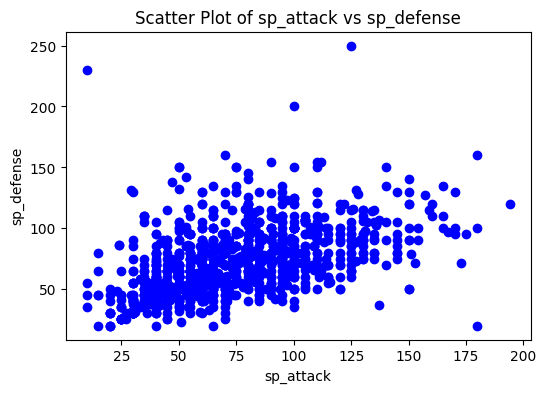

In [49]:
#scatter by sp_attack and sp_defense
plt.figure(figsize=(6,4))
plt.scatter(df['sp_attack'], df['sp_defense'], c='blue')
plt.title("Scatter Plot of sp_attack vs sp_defense")
plt.xlabel('sp_attack')
plt.ylabel('sp_defense')
plt.show()

##4. Data Preprocessing

In [50]:
#select feature to X
X = df[['sp_attack','sp_defense']]

##5. Create Cluster

###KMeans

####Determine Number of Clusters

#####Method 1 - Elbow Method

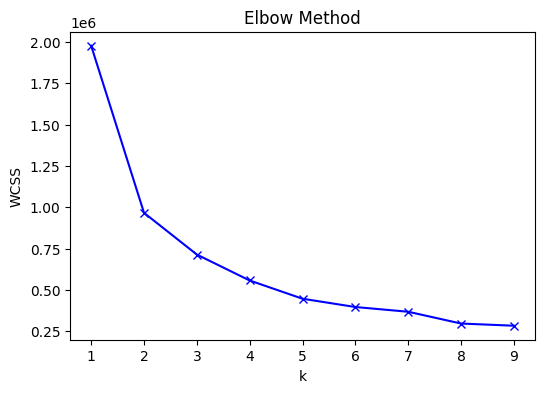

In [51]:
wcss = []
K = range(1,10)
for k in K:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X)
    wcss.append(kmeans_temp.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

#####Method 2 - Silhouette Coefficient

In [55]:
# A list holds the silhouette coefficients for each k
# Notice you start at 2 clusters for silhouette coefficient
silhouette_scores = []
K_range = range(2,10)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels_temp = kmeans_temp.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels_temp))

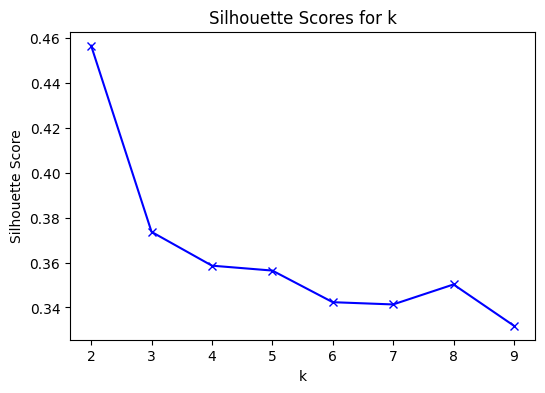

In [56]:
#silhouette plot
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, 'bx-')
plt.title('Silhouette Scores for k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

####Create Cluster

In [60]:
#kmeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

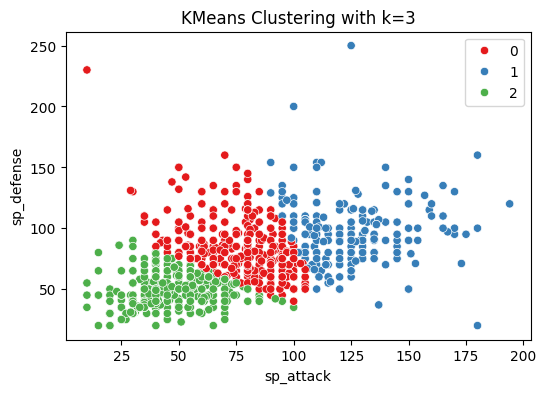

In [61]:
#kmeans scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x='sp_attack', y='sp_defense', hue=clusters, data=df, palette='Set1')
plt.title(f"KMeans Clustering with k={optimal_k}")
plt.xlabel('sp_attack')
plt.ylabel('sp_defense')
plt.show()

In [62]:
dbi = davies_bouldin_score(X, clusters)
sil = silhouette_score(X, clusters)
print("Davies-Bouldin Index:", dbi)
print("Silhouette Score:", sil)

Davies-Bouldin Index: 0.9819530788727316
Silhouette Score: 0.3736721531668033


###DBSCAN Cluster

####Determine DBSCAN Hyperparameter

In [66]:
#create eps and min_samples combination
"""
use combination below
eps_values in range 0.5,20,0.5
min_samples in range 5,10
"""
eps_values = np.arange(0.5, 20, 0.5)
min_samples_values = range(5, 10)
iteration_results = []

In [76]:
#list contains looping result
#itarate over parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_temp = DBSCAN(eps=eps, min_samples=min_samples)
        labels_temp = dbscan_temp.fit_predict(X)

        unique_labels = set(labels_temp)
        if len(unique_labels) > 1 and -1 not in unique_labels:
            sil_score = silhouette_score(X, labels_temp)
            iteration_results.append((eps, min_samples, sil_score))
        else:
            iteration_results.append((eps, min_samples, None))

In [77]:
#create a dataframe based on the iteration results
df_dbscan = pd.DataFrame(iteration_results, columns=['eps','min_samples','sil_score'])

In [79]:
valid_results = df_dbscan.dropna(subset=['sil_score'])

In [81]:
if not valid_results.empty:
    # Cari baris dengan sil_score tertinggi
    best_result = valid_results.loc[valid_results['sil_score'].idxmax()]
    best_eps = best_result['eps']
    best_min_samples = best_result['min_samples']
    print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}")

    # Create Cluster
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    labels_dbscan = dbscan.fit_predict(X)

    # Scatter DBSCAN cluster
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='sp_attack', y='sp_defense', hue=labels_dbscan, data=df, palette='Set1')
    plt.title(f"DBSCAN Clustering with eps={best_eps}, min_samples={best_min_samples}")
    plt.xlabel('sp_attack')
    plt.ylabel('sp_defense')
    plt.show()

    # 6. Cluster Evaluation
    dbi_dbscan = davies_bouldin_score(X, labels_dbscan)
    sil_dbscan = silhouette_score(X, labels_dbscan)
    print("DBSCAN Davies-Bouldin Index:", dbi_dbscan)
    print("DBSCAN Silhouette Score:", sil_dbscan)
else:
    print("Tidak ada kombinasi parameter DBSCAN yang memenuhi syarat (lebih dari 1 cluster dan tanpa semua data dianggap noise).")

Tidak ada kombinasi parameter DBSCAN yang memenuhi syarat (lebih dari 1 cluster dan tanpa semua data dianggap noise).


In [82]:
"""
pilih jumlah cluster sama dengan kmeans,
dapat menggunakan salah satu dari -
beberapa kombinasi parameter eps dan min_pts
dengan nilai silhouette score tertinggi
"""


'\npilih jumlah cluster sama dengan kmeans,\ndapat menggunakan salah satu dari -\nbeberapa kombinasi parameter eps dan min_pts\ndengan nilai silhouette score tertinggi\n'

####Create Cluster

In [44]:
#create dbscan cluster


In [45]:
#scatter dbscan cluster


##6. Cluster Evaluation

###Davies Bouldin Index (DBI)

###Silhouette Score

##7. Summary and Result Comparison

Cluster k-means sangat cocok untuk kebanyakan kombinasi data cluster akan tetapi mungkin kurang akurat untuk data yang berjauhan, pada DBSCAN kombinasi yang diberikan Tidak ada kombinasi parameter DBSCAN yang memenuhi syarat (lebih dari 1 cluster dan tanpa semua data dianggap noise).